<h1>League of Legends - Prevendo a vitória na partida</h1>
<h4>Esse código é a parte 1 de um projeto que analisa e prevê a a vitória de uma equipe no MOBA League of Legends. A ideia é utilizar dados de uma série de partidas do cenário competitivo, realizadas em 2022, para verificar a
possibilidade de vitória de uma determinada equipe para aquela partida. Do ponto de vista prático, a utilização de um modelo de previsão para vitória é pouco útil no jogo, uma vez que a habilidade dos jogadores, o nervosismo
e uma série de fatores entram em conta; além disso, tecnicamente os dados para previsão do resultado de uma partida só seriam obtidos durante a partida (e seria mais rápido esperar o final da partida para verificar o resultado). No entanto, a base apresenta um conjunto de dados relativamente simples e intuitivo - para quem conhece o jogo - no aprendizado de criação de algoritmos de classificação, assim, o maior objetivo desse trabalho é o
entendimento e treino de algoritmos de aprendizado supervisionado desse tipo.</h4>

<h3>0. Importação das bibliotecas, leitura do dataframe e criação de funções</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
arquivo = '2022_LoL_esports_match_data_from_OraclesElixir.csv'
df = pd.read_csv(arquivo)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_21628\2697138440.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo)


In [3]:
def plot_hist_variaveis(conjunto, dataframe, i=0, legend=None):
    total_plots = len(conjunto)
    fig = plt.figure(figsize=(20,6*total_plots))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)

    if legend is not None:
        for var in conjunto:
            ax = fig.add_subplot(total_plots, 2, i+1)

            sns.histplot(x=dataframe[var], ax=ax, color='#435058', hue=dataframe[legend])
            ax.set_title(var)
            ax.set_ylabel('')
            ax.set_xlabel('')
            i += 1

    else:
        for var in conjunto:
            ax = fig.add_subplot(total_plots, 2, i+1)

            sns.histplot(x=dataframe[var], ax=ax, color='#435058')
            ax.set_title(var)
            ax.set_ylabel('')
            ax.set_xlabel('')
            i += 1

In [4]:
df.columns.values

array(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch', 'participantid', 'side',
       'position', 'playername', 'playerid', 'teamname', 'teamid',
       'champion', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'gamelength',
       'result', 'kills', 'deaths', 'assists', 'teamkills', 'teamdeaths',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'firstblood', 'firstbloodkill', 'firstbloodassist',
       'firstbloodvictim', 'team kpm', 'ckpm', 'firstdragon', 'dragons',
       'opp_dragons', 'elementaldrakes', 'opp_elementaldrakes',
       'infernals', 'mountains', 'clouds', 'oceans', 'chemtechs',
       'hextechs', 'dragons (type unknown)', 'elders', 'opp_elders',
       'firstherald', 'heralds', 'opp_heralds', 'firstbaron', 'barons',
       'opp_barons', 'firsttower', 'towers', 'opp_towers',
       'firstmidtower', 'firsttothreetowers', 'turretplates',
       'opp_turretplates', 'inhibitors', 'opp_inhibitors

In [5]:
df.info(verbose=True, show_counts=True)
nulls_count = df.isnull().sum()
colunas_nulas = nulls_count[nulls_count > (149232/2)].index
colunas_id = [col for col in df.columns if 'id' in col]
colunas_id.remove('side')
colunas_removidas = colunas_nulas.union(colunas_id)

'''Colunas removidas: ['url', 'firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes',
       'opp_elementaldrakes', 'infernals', 'mountains', 'clouds', 'oceans',
       'chemtechs', 'hextechs', 'dragons (type unknown)', 'elders',
       'opp_elders', 'firstherald', 'heralds', 'opp_heralds', 'firstbaron',
       'firsttower', 'towers', 'opp_towers', 'firstmidtower',
       'firsttothreetowers', 'turretplates', 'opp_turretplates', 'gspd',
       'monsterkillsownjungle', 'monsterkillsenemyjungle']'''

df = df.drop(colunas_removidas, axis=1)
print('Foram removidas {} colunas'.format(len(colunas_nulas)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149232 entries, 0 to 149231
Data columns (total 123 columns):
 #    Column                    Non-Null Count   Dtype  
---   ------                    --------------   -----  
 0    gameid                    149232 non-null  object 
 1    datacompleteness          149232 non-null  object 
 2    url                       22404 non-null   object 
 3    league                    149232 non-null  object 
 4    year                      149232 non-null  int64  
 5    split                     102804 non-null  object 
 6    playoffs                  149232 non-null  int64  
 7    date                      149232 non-null  object 
 8    game                      149232 non-null  int64  
 9    patch                     149124 non-null  float64
 10   participantid             149232 non-null  int64  
 11   side                      149232 non-null  object 
 12   position                  149232 non-null  object 
 13   playername                1

In [6]:
indicadores_times = ['killsat10', 'assistsat10', 'deathsat10', 'goldat15', 'xpat15', 'csat15', 'killsat15', 'assistsat15', 'deathsat15']

for col in indicadores_times:
    df[col] = df[col] - df['opp_'+col]
    df.drop('opp_'+col, axis=1, inplace=True)

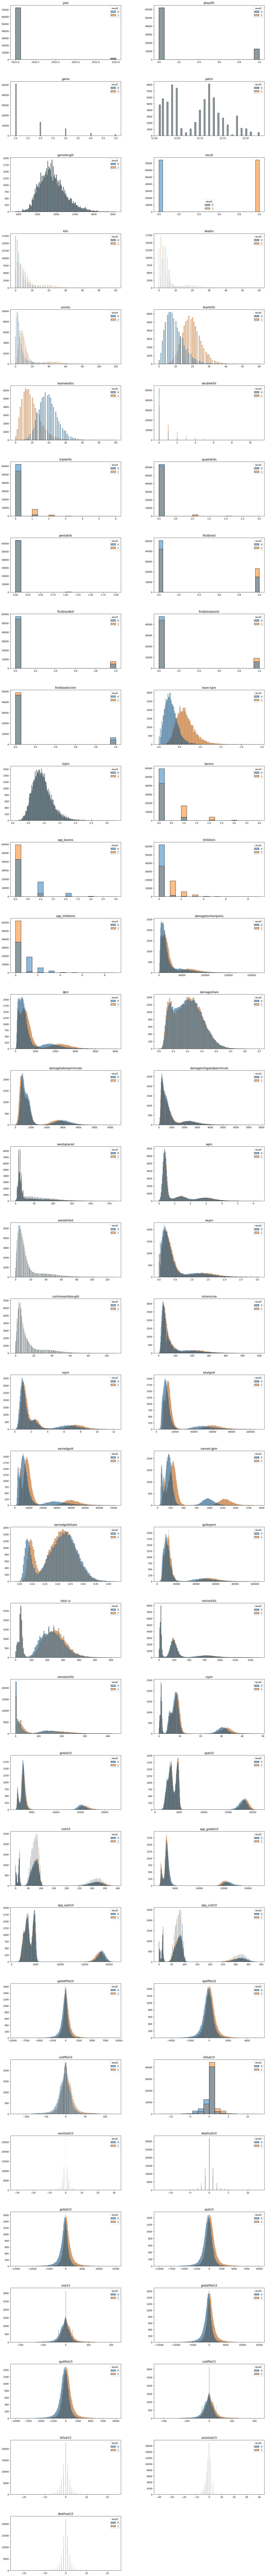

In [7]:
plot_hist_variaveis(df.select_dtypes(include='number').columns.to_list(), df, legend='result')